star wars survey analysis

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# import data
star_wars = pd.read_csv("star_wars_survey.csv", encoding="ISO-8859-1")

data clean up, the data file contains two header rows, rename some column names using the data from the second header row, small helper function is used for this task, and finally get rid of the second header row, 

In [45]:
def rename_column_names(df, old_column_names, new_column_names):
    """ Rename column names of specified dataframe to the new values."""
    
    rename_dict = dict(zip(old_column_names, new_column_names))
    df = df.rename(columns=rename_dict)

    return df

# rename column names that contain answers to which episodes the participants have seen
episodes_seen_list = ["Episode I_seen", "Episode II_seen", "Episode III_seen",
                      "Episode IV_seen", "Episode V_seen", "Episode VI_seen"] 
old_column_names = star_wars.columns[3:9].tolist()
new_column_names = episodes_seen_list

star_wars = rename_column_names(star_wars, old_column_names, new_column_names)

# rename ranking column names
episodes_ranking_list = ["Episode I_ranking", "Episode II_ranking", "Episode III_ranking",
                      "Episode IV_ranking", "Episode V_ranking", "Episode VI_ranking"] 
old_column_names = star_wars.columns[9:15].tolist()
new_column_names = episodes_ranking_list

star_wars = rename_column_names(star_wars, old_column_names, new_column_names)

# rename character ranking column names
old_column_names = star_wars.columns[15:29].tolist()
new_column_names = star_wars[star_wars.columns[15:29]].iloc[0].values.tolist()

star_wars = rename_column_names(star_wars, old_column_names, new_column_names)

# remove respondents without ID (second header row)
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

replace certain survey answers to enable easier data analysis

In [46]:
def replace_column_values(df, column_name, old_answers, new_answers):
    """Replace the specified column values with the new values."""
    replace_dict = dict(zip(old_answers, new_answers))
    df[column_name] = df[column_name].replace(replace_dict)

    return df

# rename yes/no/nan answers if the participants have seen any of the Star Wars
# movies or consider themselves star wars fans to True/False
any_episode_seen = "Have you seen any of the 6 films in the Star Wars franchise?"
old_answers = ["Yes", "No", np.nan]
new_answers = [True, False, False]

star_wars = replace_column_values(star_wars, any_episode_seen, old_answers, new_answers)

consider_fan = "Do you consider yourself to be a fan of the Star Wars film franchise?"

star_wars = replace_column_values(star_wars, consider_fan, old_answers, new_answers)

# replace answers to which episode the participants have seen with True/False values
old_answers = pd.unique(star_wars[
    star_wars.columns[3:9]].values.ravel()).tolist() # find unique values in survey columns
new_answers = [True for i in range(6)]
new_answers.append(False)

for col in star_wars.columns[3:9]:
    star_wars = replace_column_values(star_wars, col, old_answers, new_answers)

# convert values in ranking columns to floats
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# replace answers to character rankings with numerical scale from 2 (very favorably)
# to -2 (very unfavorably)
old_answers = ["Very favorably",
                  "Somewhat favorably",
                  "Neither favorably nor unfavorably (neutral)",
                  "Somewhat unfavorably",
                  "Very unfavorably",
                  "Unfamiliar (N/A)"]
new_answers = ["2",
                  "1",
                  "0",
                  "-1",
                  "-2",
                  np.nan]

for col in star_wars.columns[15:29]:
    star_wars = replace_column_values(star_wars, col, old_answers, new_answers)

# convert character rankings columns to float data type
star_wars[star_wars.columns[15:29]] = star_wars[star_wars.columns[15:29]].astype(float)

calculate mean rankings and total viewer numbers for each star wars episode and display the results in a bar chart

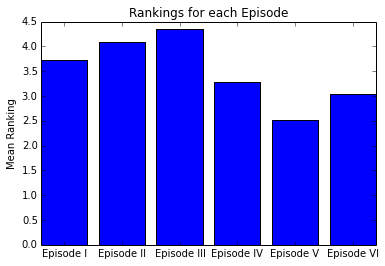

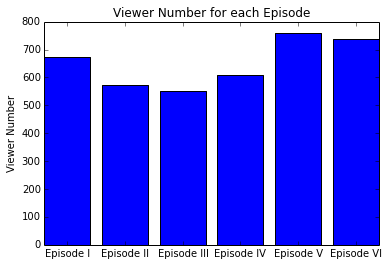

In [47]:
# calculate the mean ranking for each star wars film
mean_rankings = star_wars[star_wars.columns[9:15]].mean()

# plot mean rankings in a bar plot for each episode
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

ax.set(title="Rankings for each Episode",
       ylabel="Mean Ranking",
       xticks=(np.arange(6) + 0.4), xticklabels=["Episode I", "Episode II",
                                                 "Episode III", "Episode IV",
                                                 "Episode V", "Episode VI"])
ax.bar(range(6), mean_rankings)
plt.show()

# calculate how many people have seen each movie
sum_seens = star_wars[star_wars.columns[3:9]].sum()

# plot the viewer numbers for each episode in a bar chart
fig2 = plt.figure()
ax = fig2.add_subplot(1, 1, 1)

ax.set(title="Viewer Number for each Episode",
       ylabel="Viewer Number",
       xticks=(np.arange(6) + 0.4), xticklabels=["Episode I", "Episode II",
                                                 "Episode III", "Episode IV",
                                                 "Episode V", "Episode VI"])
ax.bar(range(6), sum_seens)
plt.show()

split the datasets into survey participants that consider themselves fans and others that do not, repeat the calculations from the previous step for each group individually

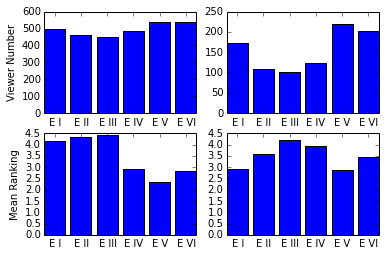

In [48]:
# split dataframe into participants that consider themselves star wars fans
# or not
sw_fan_column = "Do you consider yourself to be a fan of the Star Wars film franchise?"
sw_fans = star_wars[star_wars[sw_fan_column] == True]
not_sw_fans = star_wars[star_wars[sw_fan_column] == False]

# number of viewers of each episode for star wars fans and not star wars fans
sum_seens_sw_fans = sw_fans[sw_fans.columns[3:9]].sum()
sum_seens_not_sw_fans = not_sw_fans[not_sw_fans.columns[3:9]].sum()

# mean rankings for each episode for star wars fans and not star wars fans
mean_rankings_sw_fans = sw_fans[sw_fans.columns[9:15]].mean()
mean_rankings_not_sw_fans = not_sw_fans[not_sw_fans.columns[9:15]].mean()

# plot number of viewers and mean rankings for both participant groups
# to compare the results
fig3 = plt.figure()
ax1 = fig3.add_subplot(2, 2, 1)
ax2 = fig3.add_subplot(2, 2, 2)
ax3 = fig3.add_subplot(2, 2, 3)
ax4 = fig3.add_subplot(2, 2, 4)

ax1.set(ylabel="Viewer Number",
        xticks=(np.arange(6) + 0.4), xticklabels=["E I", "E II",
                                                  "E III", "E IV",
                                                  "E V", "E VI"])
ax2.set(xticks=(np.arange(6) + 0.4), xticklabels=["E I", "E II",
                                                  "E III", "E IV",
                                                  "E V", "E VI"])
ax3.set(ylabel="Mean Ranking",
        xticks=(np.arange(6) + 0.4), xticklabels=["E I", "E II",
                                                  "E III", "E IV",
                                                  "E V", "E VI"])
ax4.set(xticks=(np.arange(6) + 0.4), xticklabels=["E I", "E II",
                                                  "E III", "E IV",
                                                  "E V", "E VI"])
ax1.bar(range(6), sum_seens_sw_fans)
ax2.bar(range(6), sum_seens_not_sw_fans)
ax3.bar(range(6), mean_rankings_sw_fans)
ax4.bar(range(6), mean_rankings_not_sw_fans)
plt.show()

calculate the mean rankings for each character mentioned in the survey and compare the results in a bar chart

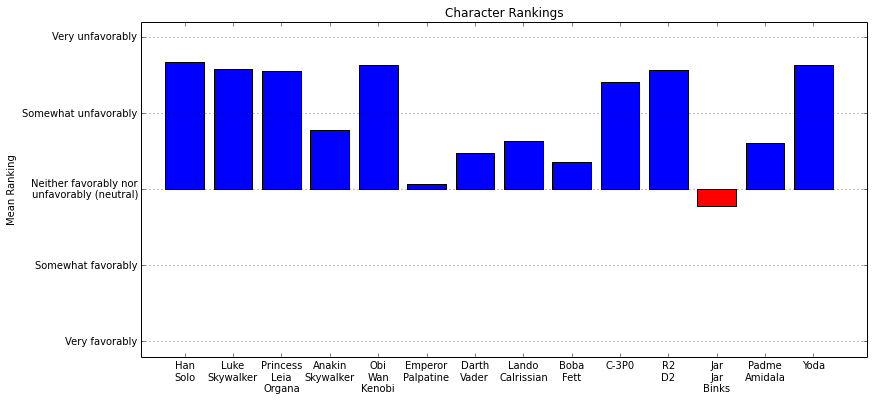

In [49]:
# calculate the mean ranking for each character
mean_rankings_characters = star_wars[star_wars.columns[15:29]].mean()

# create scatter plot of character ranking results
fig4 = plt.figure(figsize=(13,6))
ax = fig4.add_subplot(1, 1, 1)

x_labels = [label.replace(" ", "\n") for label in star_wars.columns[15:29].tolist()]
y_labels = ["Very favorably",
            "Somewhat favorably",
            "Neither favorably nor\nunfavorably (neutral)",
            "Somewhat unfavorably",
            "Very unfavorably"]

old_answers[:-1][::-1]

ax.set(title="Character Rankings",
       ylabel="Mean Ranking",
       xlim=[-0.5, 14.5],
       ylim=[-2.2, 2.2],
       xticks=np.arange(14) + 0.4,
       xticklabels=x_labels,
       yticks=[-2, -1, 0, 1, 2],
       yticklabels=y_labels)

# different colors for positive and negative bars
colors = np.array([(1,0,0)] * len(mean_rankings_characters.index))
colors[np.array(mean_rankings_characters) >= 0] = (0,0,1)

ax.bar(range(14), mean_rankings_characters, color=colors)
ax.yaxis.grid()
plt.show()